In [1]:
import pandas as pd
import numpy as np

In [18]:
#读取员工离职预测数据
df = pd.read_csv(r"C:\Users\zhouy\Desktop\数据科学技术与应用\员工离职预测训练赛\pfm_train.csv",delimiter=',')

In [3]:
#数据降维：剔除无关变量“EmployeeNumber”(员工号码)、“Over18”（年龄是否超过18）、“StandardHours”（标准工时）
df = df.drop(['EmployeeNumber','Over18','StandardHours'],axis=1)

In [4]:
data = df[['TotalWorkingYears', 'MonthlyIncome', 'JobLevel', 'Age',
       'YearsAtCompany', 'YearsInCurrentRole', 'StockOptionLevel',
       'YearsWithCurrManager', 'JobSatisfaction', 'JobInvolvement','Attrition']].copy()

In [4]:
data_x = df[['TotalWorkingYears', 'MonthlyIncome', 'JobLevel', 'Age',
       'YearsAtCompany', 'YearsInCurrentRole', 'StockOptionLevel',
       'YearsWithCurrManager', 'JobSatisfaction', 'JobInvolvement']].copy()

In [5]:
data.head(3)

,TotalWorkingYears,MonthlyIncome,JobLevel,Age,YearsAtCompany,YearsInCurrentRole,StockOptionLevel,YearsWithCurrManager,JobSatisfaction,JobInvolvement,Attrition
0,7,5993,2,37,7,5,1,7,3,2,0
1,33,10502,3,54,5,4,1,4,3,3,0
2,9,6074,2,34,9,7,0,6,3,1,1


In [6]:
X = data.iloc[:,0:10].values.astype(float)

In [1]:
#模型初始化,提取2个成分
from sklearn.decomposition import PCA
pca=PCA(n_components=2)   
pca.fit(X)

NameError: name 'X' is not defined

In [14]:
print(pca.components_)                 #提取出的主成分
print(pca.explained_variance_)       #降维后主成分方差,特征值
print(pca.explained_variance_ratio_)  #主成分方差占比

[[ 1.28129092e-03  9.99998380e-01  2.23373775e-04  9.58603552e-04
   6.87126768e-04  2.97844061e-04 -1.13038532e-06  2.62670191e-04
  -2.29508020e-06  9.15982524e-07]
 [ 4.46237572e-01 -1.62258684e-03  8.76241438e-03  8.40165628e-01
   2.54410251e-01  1.18768327e-01  7.43034982e-04  1.26730208e-01
  -1.24241991e-03  4.60453324e-03]]
[2.22340641e+07 7.39267896e+01]
[9.99993735e-01 3.32491290e-06]


In [8]:
#十维变两维
X_new=pca.transform(X)
X_new

array([[-4.90624553e+02, -6.35446814e-01],
       [ 4.01841552e+03,  1.69388892e+01],
       [-4.09623290e+02, -1.78061871e+00],
       ...,
       [-1.49629995e+02, -3.30294534e+00],
       [-4.01164858e+03, -1.32133015e+01],
       [-4.44163515e+03, -5.92193577e+00]])

In [31]:
y = data['Attrition'].values.astype(int)

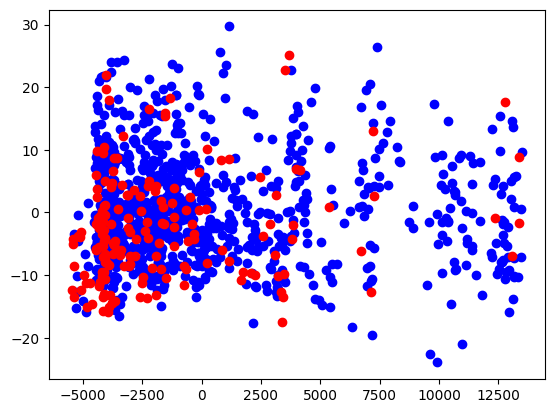

In [32]:
#绘制散点图，虽然效果不好，但是还有重要的离散变量没有考虑，所以直接从后面的模型预测结果来看整体
import matplotlib.pyplot as plt
colors=["b","r"]
for i in range(2):
    cl=X_new[y==i]
    plt.scatter(cl[:,0],cl[:,1],c=colors[i])

In [9]:
#将PCA后的数据重新保存
data['Income'] = 0.99*data.MonthlyIncome
data['Time'] = 0.45*data.TotalWorkingYears+0.84*data.Age+0.25*data.YearsAtCompany+0.12*data.YearsInCurrentRole+0.13*data.YearsWithCurrManager

In [10]:
data.head(3)

,TotalWorkingYears,MonthlyIncome,JobLevel,Age,YearsAtCompany,YearsInCurrentRole,StockOptionLevel,YearsWithCurrManager,JobSatisfaction,JobInvolvement,Attrition,Income,Time
0,7,5993,2,37,7,5,1,7,3,2,0,5933.07,37.49
1,33,10502,3,54,5,4,1,4,3,3,0,10396.98,62.46
2,9,6074,2,34,9,7,0,6,3,1,1,6013.26,36.48


In [11]:
data.shape

(1100, 13)

In [15]:
train_pca = data[['Attrition','Income','Time']].copy()
train_pca['index'] = pd.Series(np.arange(1100))
train_pca.tail(3)

,Attrition,Income,Time,index
1097,0,6270.66,35.38,1097
1098,1,2447.28,19.18,1098
1099,1,2021.58,25.79,1099


In [16]:
#数据：两个主成分+label
train_pca.to_csv('train_pca.csv',index=False)

In [37]:
df['Income'] = 0.99*df.MonthlyIncome
df['Time'] = 0.45*df.TotalWorkingYears+0.84*df.Age+0.25*df.YearsAtCompany+0.12*df.YearsInCurrentRole+0.13*df.YearsWithCurrManager

In [40]:
df_pca = df.drop(['TotalWorkingYears', 'MonthlyIncome', 'JobLevel', 'Age',
       'YearsAtCompany', 'YearsInCurrentRole', 'StockOptionLevel',
       'YearsWithCurrManager', 'JobSatisfaction', 'JobInvolvement','DistanceFromHome','Education','EnvironmentSatisfaction',\
                 'NumCompaniesWorked','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','TrainingTimesLastYear',\
                 'WorkLifeBalance','YearsSinceLastPromotion'],axis=1)

In [41]:
#保存数据：7个原始离散变量+两个主成分+label，用在决策树
df_pca.to_csv('df_pca.csv',index=False)

In [42]:
df_pca.shape

(1100, 10)

### 离散数据卡方检验

In [15]:
from  scipy.stats import chi2_contingency

In [20]:
table1 = pd.crosstab(df['JobRole'],df['Attrition'])
table1

Attrition,0,1
JobRole,,
Healthcare Representative,95,5
Human Resources,24,9
Laboratory Technician,162,43
Manager,75,5
Manufacturing Director,93,8
Research Director,54,2
Research Scientist,180,41
Sales Executive,205,42
Sales Representative,34,23


In [21]:
result1 = chi2_contingency(table1)#卡方检验函数
print(result1)

(58.73752572479258, 8.239099007103527e-10, 8, array([[ 83.81818182,  16.18181818],
       [ 27.66      ,   5.34      ],
       [171.82727273,  33.17272727],
       [ 67.05454545,  12.94545455],
       [ 84.65636364,  16.34363636],
       [ 46.93818182,   9.06181818],
       [185.23818182,  35.76181818],
       [207.03090909,  39.96909091],
       [ 47.77636364,   9.22363636]]))


In [22]:
table2 = pd.crosstab(df['Department'],df['Attrition'])
table2

Attrition,0,1
Department,,
Human Resources,33,9
Research & Development,625,102
Sales,264,67


In [23]:
result2 = chi2_contingency(table2)#卡方检验函数
print(result2)

(7.356135668180397, 0.02527175691971158, 2, array([[ 35.20363636,   6.79636364],
       [609.35818182, 117.64181818],
       [277.43818182,  53.56181818]]))


In [24]:
table3 = pd.crosstab(df['BusinessTravel'],df['Attrition'])
#table3
result3 = chi2_contingency(table3)#卡方检验函数
print(result3)

(10.99989141938683, 0.004086993316561267, 2, array([[ 90.52363636,  17.47636364],
       [171.82727273,  33.17272727],
       [659.64909091, 127.35090909]]))


In [27]:
table4 = pd.crosstab(df['EducationField'],df['Attrition'])

result4 = chi2_contingency(table4)#卡方检验函数
print(result4)

(12.938568859121506, 0.023961295777270884, 5, array([[ 15.92545455,   3.07454545],
       [387.24      ,  74.76      ],
       [106.44909091,  20.55090909],
       [282.46727273,  54.53272727],
       [ 52.80545455,  10.19454545],
       [ 77.11272727,  14.88727273]]))


In [28]:
table5 = pd.crosstab(df['MaritalStatus'],df['Attrition'])

result5= chi2_contingency(table5)#卡方检验函数
print(result5)

(39.27373565955939, 2.9635800301638634e-09, 2, array([[199.48727273,  38.51272727],
       [419.09090909,  80.90909091],
       [303.42181818,  58.57818182]]))


In [29]:
table6 = pd.crosstab(df['OverTime'],df['Attrition'])

result6= chi2_contingency(table6)#卡方检验函数
print(result6)

(76.85489217426525, 1.8399188770234625e-18, 1, array([[665.51636364, 128.48363636],
       [256.48363636,  49.51636364]]))


In [30]:
table7 = pd.crosstab(df['Gender'],df['Attrition'])

result7= chi2_contingency(table7)#卡方检验函数
print(result7)

(0.22295435268145092, 0.6367980114960254, 1, array([[374.66727273,  72.33272727],
       [547.33272727, 105.66727273]]))


### 对离散数据one-hot编码

In [17]:
dumm_dep = pd.get_dummies( df['Department'], prefix='Department' )
dumm_bt = pd.get_dummies( df['BusinessTravel'], prefix='BusinessTravel' )
dumm_ef = pd.get_dummies( df['EducationField'], prefix='EducationField' )
dumm_jr = pd.get_dummies( df['JobRole'], prefix='JobRole' )
dumm_ms = pd.get_dummies( df['MaritalStatus'], prefix='MaritalStatus' )
dumm_ot = pd.get_dummies( df['OverTime'], prefix='OverTime' )

In [18]:
#保存one-hot的数据
train_one_hot = data.join([dumm_dep,dumm_bt,dumm_ef,dumm_jr,dumm_ms,dumm_ot], how='outer')

In [19]:
train_one_hot['index'] = pd.Series(np.arange(1100))

In [20]:
train_one_hot.tail(3)

,TotalWorkingYears,MonthlyIncome,JobLevel,Age,YearsAtCompany,YearsInCurrentRole,StockOptionLevel,YearsWithCurrManager,JobSatisfaction,JobInvolvement,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,index
1097,9,6334,2,37,1,0,2,0,3,2,...,0,0,1,0,1,0,0,1,0,1097
1098,1,2472,1,22,1,0,0,0,2,3,...,0,1,0,0,0,0,1,0,1,1098
1099,6,2042,1,26,3,2,1,2,1,3,...,0,1,0,0,0,1,0,0,1,1099


In [21]:
#数据：独热编码+十个连续变量（相关性最大的十个）+label
train_one_hot.to_csv('train_one_hot.csv',index=False)

### 将PCA和ONE-HOT后的数据保存

In [25]:
train_one_pca = train_one_hot.drop(['TotalWorkingYears', 'MonthlyIncome', 'JobLevel', 'Age',
       'YearsAtCompany', 'YearsInCurrentRole', 'StockOptionLevel',
       'YearsWithCurrManager', 'JobSatisfaction', 'JobInvolvement'],axis=1)

In [30]:
train_one_pca.head(3)

,Attrition,Income,Time,Department_Human Resources,Department_Research & Development,Department_Sales,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,EducationField_Human Resources,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0,5933.07,37.49,0,1,0,0,0,1,0,...,1,0,0,0,0,1,0,0,1,0
1,0,10396.98,62.46,0,1,0,0,1,0,0,...,1,0,0,0,0,1,0,0,1,0
2,1,6013.26,36.48,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1


In [28]:
train_one_pca = train_one_pca.drop(['index'],axis=1)

In [29]:
#数据：独热编码+两个主成分+label
train_one_pca.to_csv('train_one_pca.csv',index=False)